<a href="https://colab.research.google.com/github/aivision2020/OctSceneScan/blob/master/youtube_bb_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import glob
basedir = '/content/gdrive/My Drive/videos_2/yt_bb_detection_train'

In [0]:
import pandas as pd
import os
from torch.utils.data.dataset import Dataset
import imageio

class InstanceDataset(Dataset):
    def __init__(self, basedir):
        super().__init__()
        files = glob.glob(os.path.join(basedir ,'*','*','*.jpg'))
        self.data = pd.DataFrame([self._split_file(f) for f in files], 
                            columns=['class_id', 'instance_id', 'file_path'])
        
    def _split_file(self, f):
        parts = f.split(os.sep)[-3:-1]
        return parts[0], parts[1], f 

    def __getitem__(self, index):
      dat = self.data.iloc[index]
      img = imageio.imread(dat['file_path'])
      return (img, dat['class_id'], dat['instance_id'])
              
    def __len__(self):
        return len(self.data)
      

99012


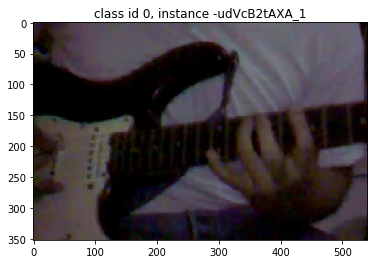

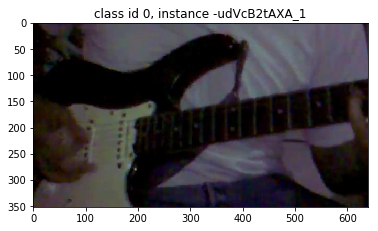

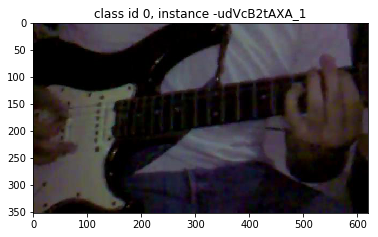

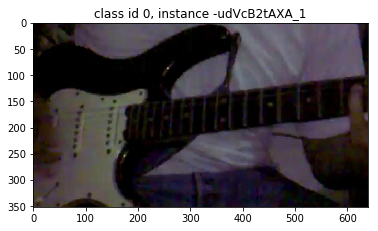

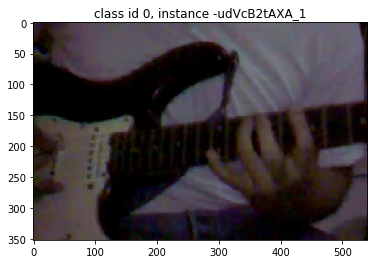

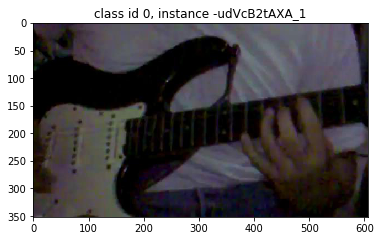

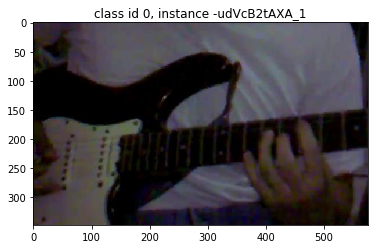

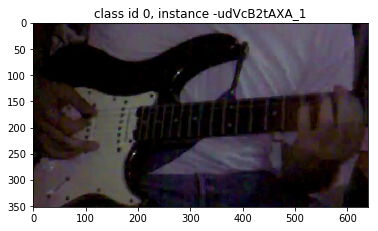

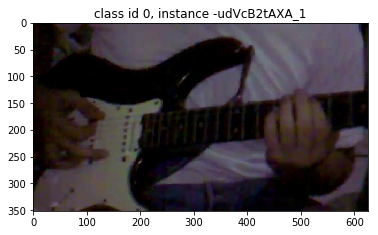

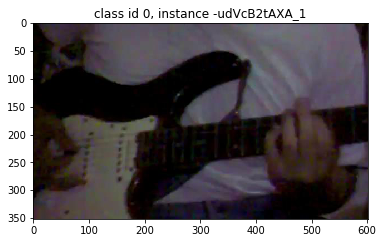

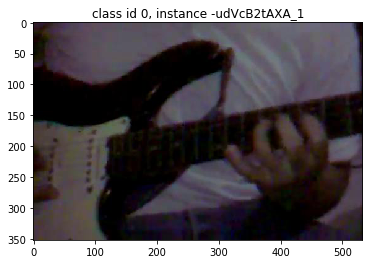

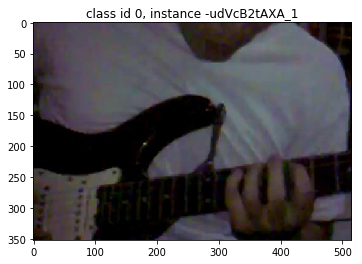

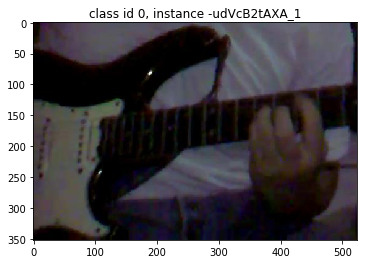

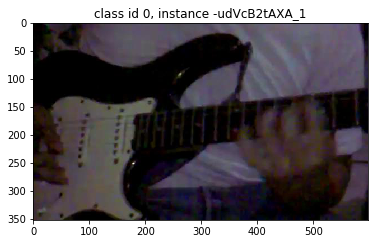

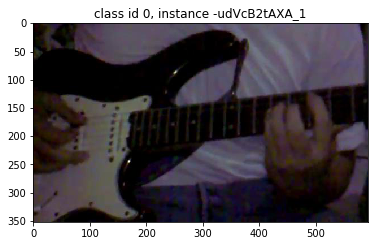

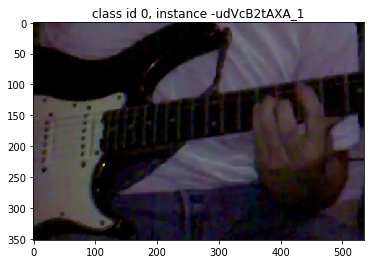

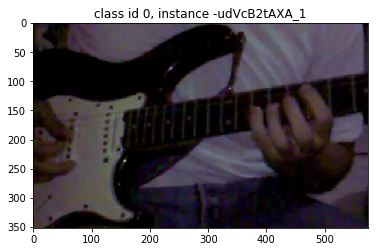

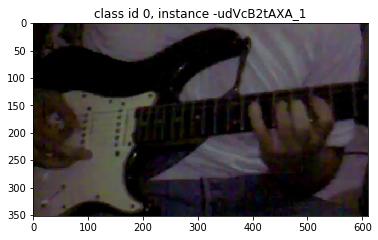

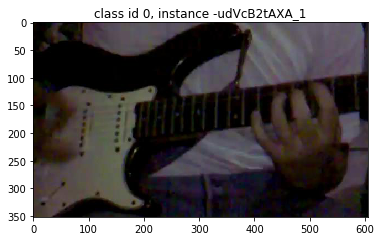

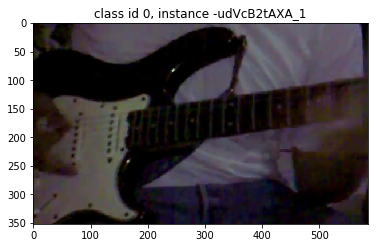

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#example. 
# this is not how you're supposed to use dataset!
# you should axes it via torch DataLoader...
# never dirrectly call __getitem__, or access the members (dataset.data)

dataset = InstanceDataset(basedir)
print(len(dataset))
im, class_id, instance_id = dataset.__getitem__(5000)
plt.figure()
plt.imshow(im)
plt.title(f'class id {class_id}, instance {instance_id}')

#just for fun, lets find another one of this guy
thisguy = dataset.data[dataset.data['instance_id']==instance_id]
for ind, dat in thisguy.iterrows():
  plt.figure()
  plt.imshow(imageio.imread(dat['file_path']))
  plt.title(f'class id {dat["class_id"]}, instance {dat["instance_id"]}')
